This analysis borrowed from Abhishek Sharma https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import pylab
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
    points = []
    for i in range(1, n + 1):
        x = math.cos(2 * math.pi / n * i) * r + np.random.normal(-30,30)
        y = math.sin(2 * math.pi / n * i) * r + np.random.normal(-30,30)
        points.append((x, y))
    return points

In [10]:
# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500, 1000))
df = df.append(PointsInCircum(300, 700))
df = df.append(PointsInCircum(100, 300))

# Adding noise to the dataset
df = df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

In [11]:
df

,0,1
0,511.815569,-33.701281
1,485.617665,-21.888723
2,472.564050,-0.845849
3,423.171997,-19.929177
4,492.308604,-2.696244
...,...,...
295,514.000000,-515.000000
296,298.000000,-208.000000
297,72.000000,443.000000
298,-537.000000,-414.000000


In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 1.85062659, -0.03211819],
       [ 1.76099371,  0.00841599],
       [ 1.71633239,  0.08062351],
       ...,
       [ 0.34585212,  1.60365738],
       [-1.73776592, -1.3370934 ],
       [ 0.04134965, -1.30621037]])

Text(0, 0.5, 'Feature 2')

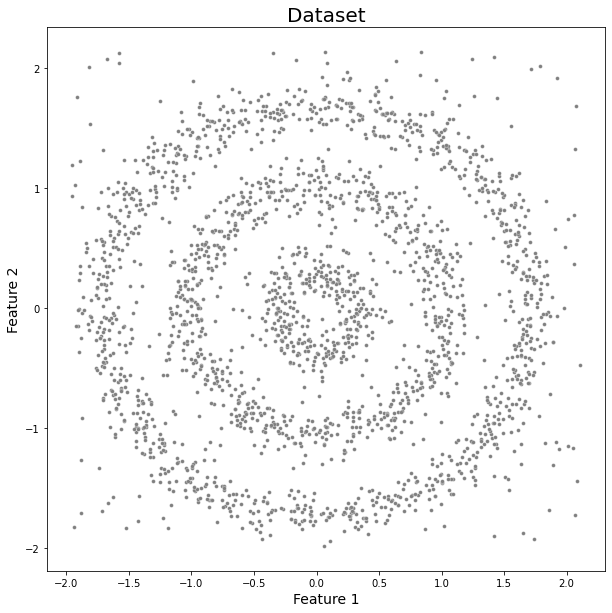

In [15]:
pylab.figure(figsize=(10, 10))
#sns.scatterplot(x=df[0], y=df[1], s=15, color='grey')
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], s=15, color='grey')
pylab.title('Dataset', fontsize=20)
pylab.xlabel('Feature 1', fontsize=14)
pylab.ylabel('Feature 2', fontsize=14)

In [16]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
#k_means.fit(df[[0, 1]])
k_means.fit(scaled_data)

KMeans(n_clusters=3)

Text(0, 0.5, 'Feature 2')

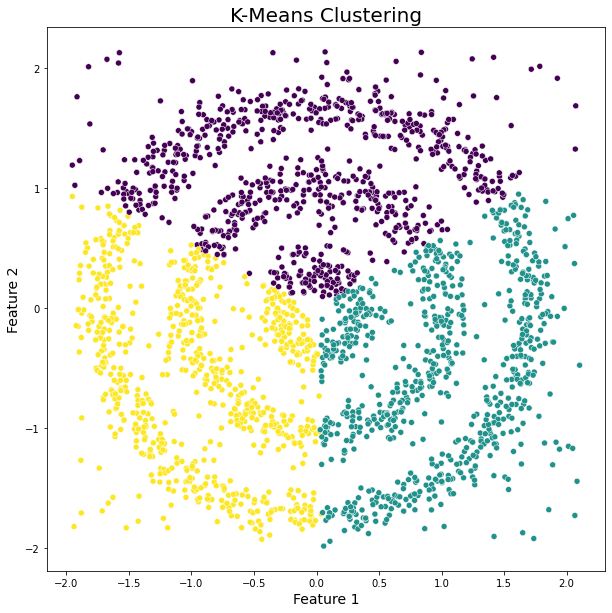

In [24]:
# Plotting resulting clusters
pylab.figure(figsize=(10, 10))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], c=k_means.labels_)
pylab.title('K-Means Clustering', fontsize=20)
pylab.xlabel('Feature 1', fontsize=14)
pylab.ylabel('Feature 2', fontsize=14)

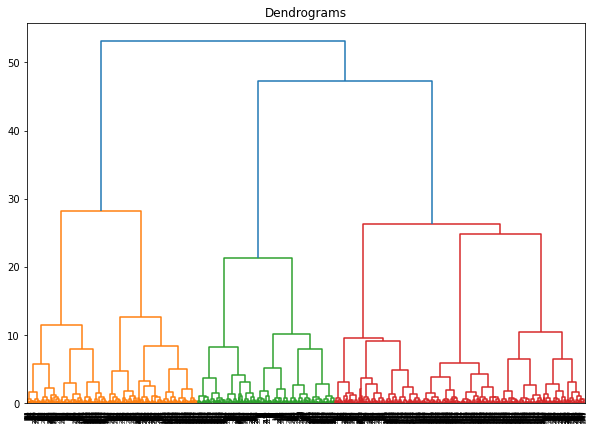

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model.fit(df)

AgglomerativeClustering(n_clusters=3)

Text(0, 0.5, 'Feature 2')

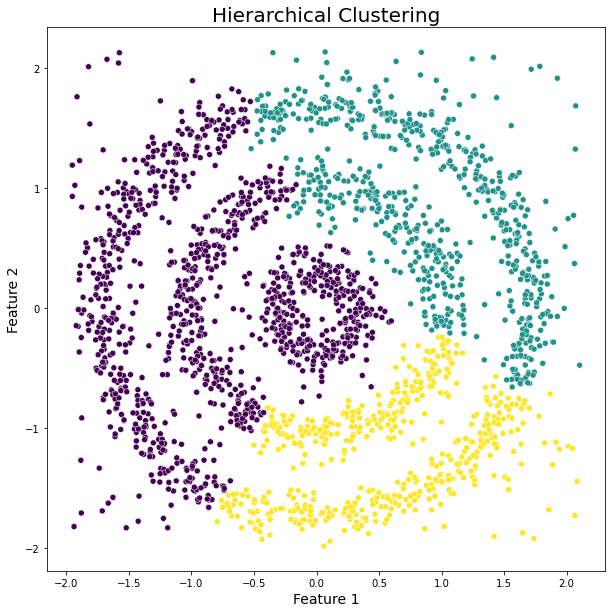

In [25]:
# Plotting resulting clusters
pylab.figure(figsize=(10,10))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], c=model.labels_)
pylab.title('Hierarchical Clustering', fontsize=20)
pylab.xlabel('Feature 1', fontsize=14)
pylab.ylabel('Feature 2', fontsize=14)

In [26]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(scaled_data)

DBSCAN()

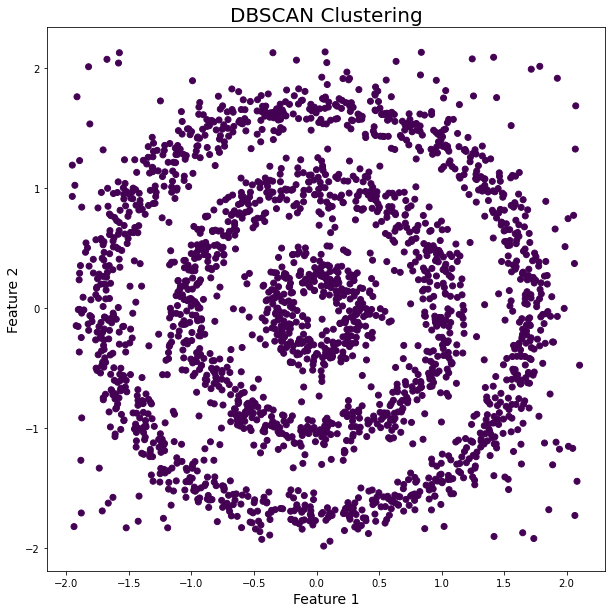

In [27]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan.labels_)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [60]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

Text(0, 0.5, 'Epsilon')

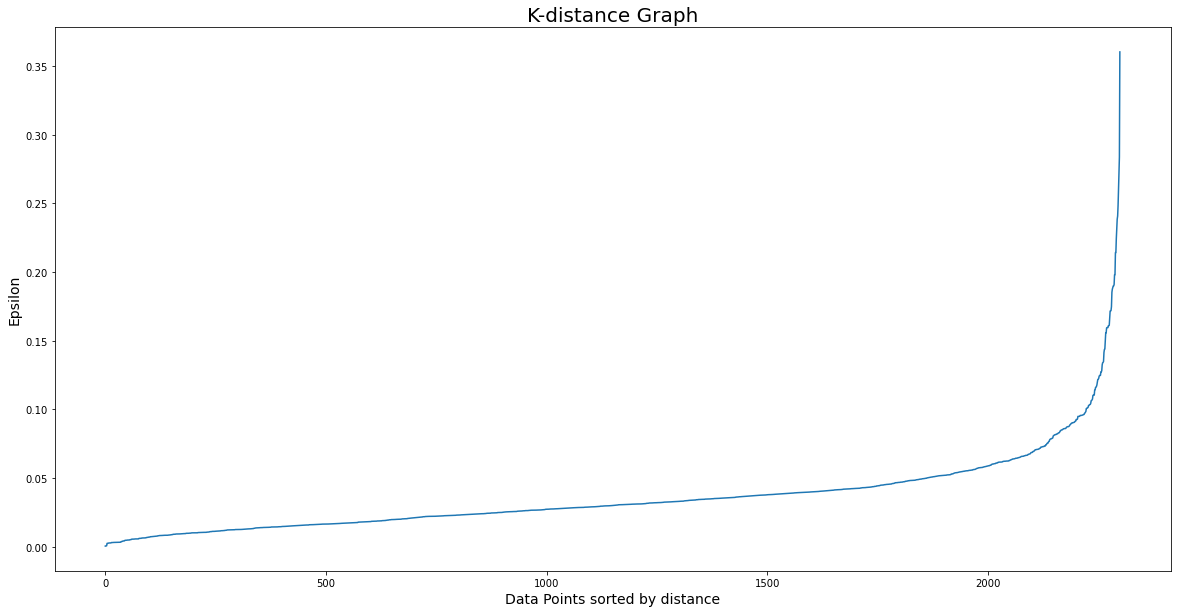

In [61]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
pylab.figure(figsize=(20,10))
pylab.plot(distances)
pylab.title('K-distance Graph', fontsize=20)
pylab.xlabel('Data Points sorted by distance', fontsize=14)
pylab.ylabel('Epsilon', fontsize=14)


In [76]:
dbscan_opt = DBSCAN(eps=0.12, min_samples=6)
dbscan_opt.fit(scaled_data)

DBSCAN(eps=0.12, min_samples=6)

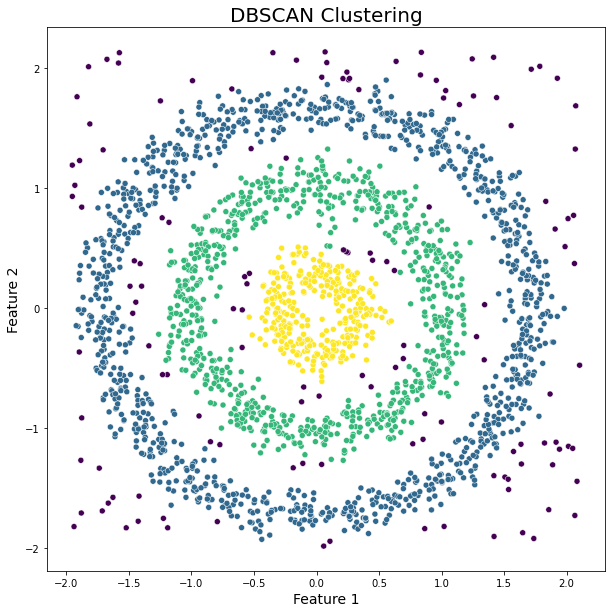

In [77]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], c=dbscan_opt.labels_)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()